In [9]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
from scipy.stats import truncnorm

In [34]:
df = pd.read_csv('co2.csv')

In [35]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [36]:
df.columns = ['make', 'model', 'class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_city',
       'fuel_hwy', 'consumption_comb',
       'comb_mpg', 'emissions']


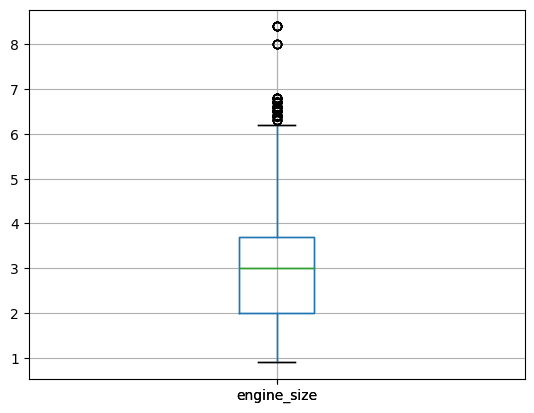

In [39]:
df.loc[ : , ["engine_size"]  ].boxplot()
plt.show()

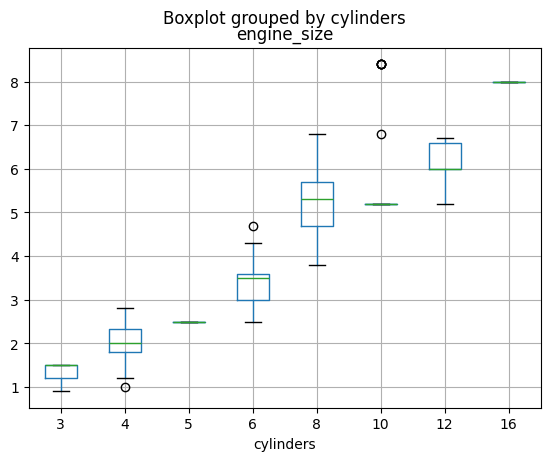

In [14]:
df.boxplot(
    column="engine_size",
    by="cylinders"
)
plt.show()

In [15]:
df.groupby( "cylinders" ).agg({
    "make": ["count"]
})

,make
,count
cylinders,
3,95
4,3220
5,26
6,2446
8,1402
10,42
12,151
16,3


### Segun esta tabla de distribucion de frecuencias y los boxplot de arriba podes excluir los carros que tienen solamente 16 cilindros

In [50]:
df  = df.loc[ ~(df["cylinders"] == 16 )  , : ]

In [51]:
df.shape

(7382, 12)

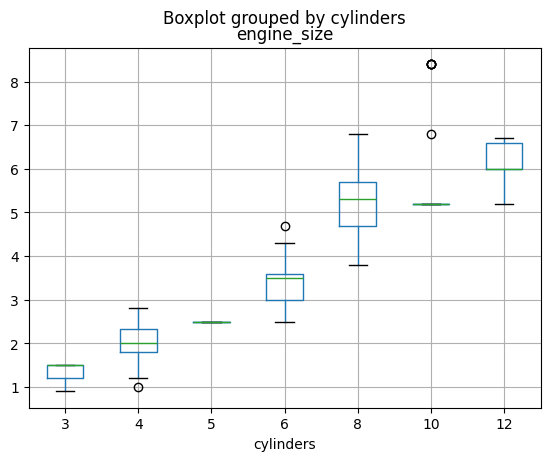

In [20]:
df.boxplot(
    column="engine_size",
    by="cylinders"
)
plt.show()

In [28]:
df = df.loc[ ~(( df["cylinders"] == 10 ) & ( df["engine_size"] > 6 ))  , : ]

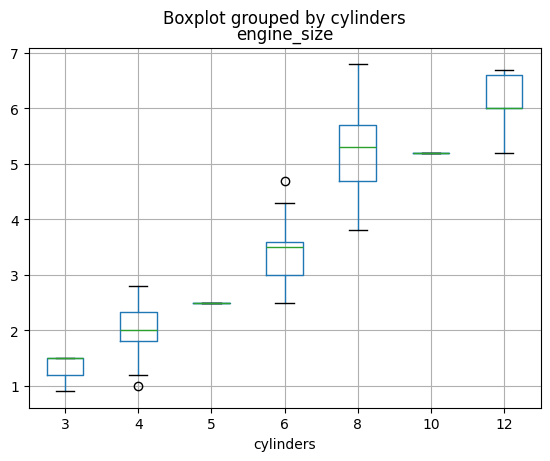

In [29]:
df.boxplot(
    column="engine_size",
    by="cylinders"
)
plt.show()

In [33]:
df.loc[ df["cylinders"] == 10 , : ].describe()

,engine_size,cylinders,fuel_city,fuel_hwy,consumption_comb,comb_mpg,emissions
count,3.600000e+01,36.0,36.000000,36.000000,36.000000,36.000000,36.000000
mean,5.200000e+00,10.0,17.852778,12.052778,15.255556,18.555556,355.416667
std,9.007773e-16,0.0,1.272228,1.033575,1.033840,1.229273,22.989905
min,5.200000e+00,10.0,16.000000,9.500000,13.100000,16.000000,304.000000
25%,5.200000e+00,10.0,16.900000,11.375000,14.500000,18.000000,338.000000
50%,5.200000e+00,10.0,17.900000,11.900000,14.950000,19.000000,348.000000
75%,5.200000e+00,10.0,18.125000,12.925000,15.700000,19.000000,370.000000
max,5.200000e+00,10.0,21.100000,13.800000,17.800000,22.000000,409.000000


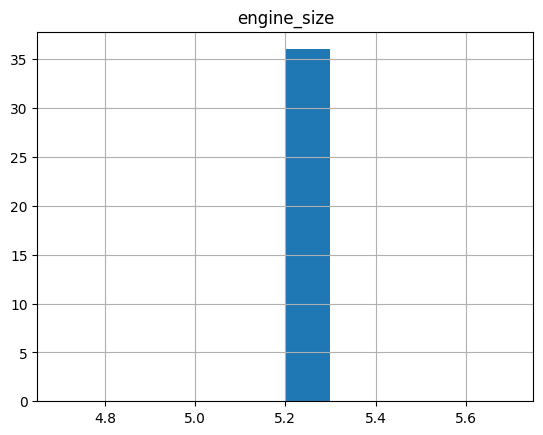

In [31]:
plt.show()

## Como calculamos numericamente los valores atipicos

In [44]:
data = df.loc[ : , "engine_size" ].to_list()
data_series = pd.Series(data)

In [45]:
data_series

0       2.0
1       2.4
2       1.5
3       3.5
4       3.5
       ... 
7380    2.0
7381    2.0
7382    2.0
7383    2.0
7384    2.0
Length: 7385, dtype: float64

In [47]:
Q1 = data_series.quantile(0.25)
Q3 = data_series.quantile(0.75)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

In [48]:
upper_bound

np.float64(6.25)

## Limpiemos outliers en funcion de la columna de cilindros

In [62]:
cylinders  = df.loc[ : , ["cylinders"] ].drop_duplicates()

final_df = pd.DataFrame()

for c in cylinders["cylinders"]:

    sub_df = df.loc[ df["cylinders"] == c , : ]
    data = sub_df.loc[ : , "engine_size" ].to_list()
    data_series = pd.Series(data)
    Q1 = data_series.quantile(0.25)
    Q3 = data_series.quantile(0.75)

    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    sub_df = sub_df.loc[ (sub_df["engine_size"] > lower_bound) & (sub_df["engine_size"] < upper_bound) , : ]
    final_df = pd.concat( [ final_df , sub_df ] )


In [63]:
final_df

,make,model,class,engine_size,cylinders,transmission,fuel_type,fuel_city,fuel_hwy,consumption_comb,comb_mpg,emissions
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212
10,ACURA,TSX,COMPACT,2.4,4,M6,Z,11.2,8.1,9.8,29,225
...,...,...,...,...,...,...,...,...,...,...,...,...
7200,MINI,Cooper Clubman ALL4,MID-SIZE,1.5,3,AS8,Z,9.7,7.0,8.5,33,197
7201,MINI,Cooper Convertible,MINICOMPACT,1.5,3,AM7,Z,8.3,6.4,7.5,38,174
7202,MINI,Cooper Countryman ALL4,MID-SIZE,1.5,3,AS8,Z,9.8,7.1,8.6,33,200
7213,MITSUBISHI,Mirage,COMPACT,1.2,3,AV,X,6.6,5.6,6.2,46,143


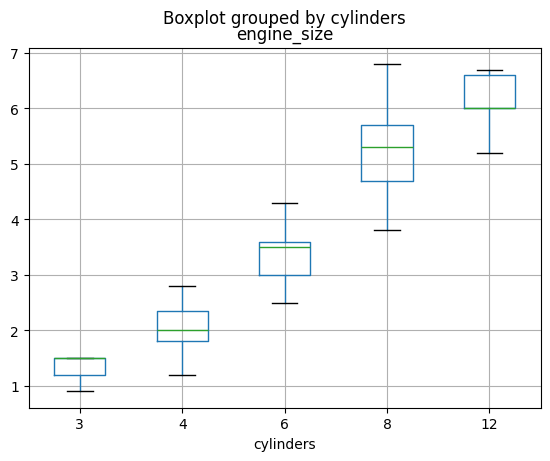

In [64]:
final_df.boxplot(
    column="engine_size",
    by="cylinders"
)
plt.show()